## 자연어 처리 딥러닝
# 단어 임베딩
- word2vec 알고리즘
- 한 단어는 단어집의 갯수만큼의 차원을 가진다. (원핫인코딩 형태)
- 이렇게 큰 단어의 차원을 줄여주는 것이 단어 임베딩이다.
- 단어 임베딩은 학습을 통해 얻을 수 있다.

<img src='embedding.jpg' />
(출처: http://th-mayer.de/pycon2018/#/6)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

### IMDb 데이터

In [23]:
help(keras.datasets.imdb.load_data)

Help on function load_data in module tensorflow.python.keras.datasets.imdb:

load_data(path='imdb.npz', num_words=None, skip_top=0, maxlen=None, seed=113, start_char=1, oov_char=2, index_from=3, **kwargs)
    Loads the [IMDB dataset](https://ai.stanford.edu/~amaas/data/sentiment/).
    
    This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment
    (positive/negative). Reviews have been preprocessed, and each review is
    encoded as a list of word indexes (integers).
    For convenience, words are indexed by overall frequency in the dataset,
    so that for instance the integer "3" encodes the 3rd most frequent word in
    the data. This allows for quick filtering operations such as:
    "only consider the top 10,000 most
    common words, but eliminate the top 20 most common words".
    
    As a convention, "0" does not stand for a specific word, but instead is used
    to encode any unknown word.
    
    Arguments:
        path: where to cache the data (relativ

In [51]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)
    # 가장 빈도가 높은 만개의 단어만 추출 (0~9999)
    # 0 : padding 용도
    # 1 : start character
    # 2 : out-of-vocabulary (10000번 이상의 단어를 표시)
    # 3 : 사용되지 않았음
    # 빈도가 높은 순서 대로 4번 부터 번호를 붙인다
    # C:\Users\사용자아이디\.keras\datasets\imdb.npz 에 저장됨

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
d:\anaconda3_5.3.0\envs\py38\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
d:\anaconda3_5.3.0\envs\py38\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If y

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [5]:
print(*X_train[0])
    # 단어들의 인덱스임 (1~9999 인 단어만 있음)
    # 첫번째 1은 start character
    # 2 는 10000개의 단어 중에 없는 단어임

1 14 22 16 43 530 973 1622 1385 65 458 4468 66 3941 4 173 36 256 5 25 100 43 838 112 50 670 2 9 35 480 284 5 150 4 172 112 167 2 336 385 39 4 172 4536 1111 17 546 38 13 447 4 192 50 16 6 147 2025 19 14 22 4 1920 4613 469 4 22 71 87 12 16 43 530 38 76 15 13 1247 4 22 17 515 17 12 16 626 18 2 5 62 386 12 8 316 8 106 5 4 2223 5244 16 480 66 3785 33 4 130 12 16 38 619 5 25 124 51 36 135 48 25 1415 33 6 22 12 215 28 77 52 5 14 407 16 82 2 8 4 107 117 5952 15 256 4 2 7 3766 5 723 36 71 43 530 476 26 400 317 46 7 4 2 1029 13 104 88 4 381 15 297 98 32 2071 56 26 141 6 194 7486 18 4 226 22 21 134 476 26 480 5 144 30 5535 18 51 36 28 224 92 25 104 4 226 65 16 38 1334 88 12 16 283 5 16 4472 113 103 32 15 16 5345 19 178 32


In [9]:
max([max(l) for l in X_train]), min([min(l) for l in X_train])

(9999, 1)

In [15]:
len_list = [len(l) for l in X_train]
max(len_list), min(len_list)

(2494, 11)

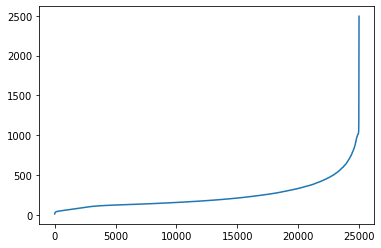

In [16]:
plt.plot(sorted(len_list))

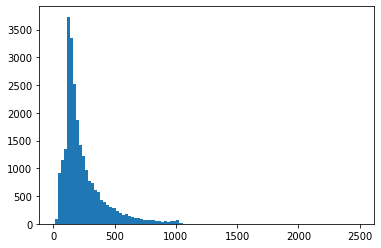

In [17]:
plt.hist(len_list, bins=100)
pass

In [18]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [19]:
np.bincount(y_train)

array([12500, 12500], dtype=int64)

- 단어사전 얻기(단어, 인덱스)
- C:\Users\사용자아이디\\.keras\datasets\imdb_word_index.json
- X_train 의 인덱스 값에서 3을 빼줘야 word_index 의 인덱스 값에 해당함

In [11]:
w2i = keras.datasets.imdb.get_word_index()

In [12]:
len(w2i), type(w2i)

(88584, dict)

In [13]:
n = 0
for k in w2i:
    print(k, w2i[k])
    n += 1
    if n>=5: break

fawn 34701
tsukino 52006
nunnery 52007
sonja 16816
vani 63951


In [14]:
i2w = {}

for k,v in w2i.items():
    i2w[v] = k
    
# i2w

In [22]:
i2w[1], i2w[88584] # i2w[0] 은 없음

('the', "'l'")

### 각 문장의 단어를 20개로 제한

In [23]:
from tensorflow.keras import preprocessing

In [24]:
preprocessing.sequence.pad_sequences([[1,2,3],[4,5,6],[1,2,3,4,5,6,7,8,9,10]], maxlen=5)

array([[ 0,  0,  1,  2,  3],
       [ 0,  0,  4,  5,  6],
       [ 6,  7,  8,  9, 10]])

In [52]:
X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=100)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=100)

In [53]:
print(X_train.shape)
print(X_train[0]) # 뒷부분만 남긴다 (100단어 보다 작은 경우 앞에 0을 채운다)

(25000, 100)
[1415   33    6   22   12  215   28   77   52    5   14  407   16   82
    2    8    4  107  117 5952   15  256    4    2    7 3766    5  723
   36   71   43  530  476   26  400  317   46    7    4    2 1029   13
  104   88    4  381   15  297   98   32 2071   56   26  141    6  194
 7486   18    4  226   22   21  134  476   26  480    5  144   30 5535
   18   51   36   28  224   92   25  104    4  226   65   16   38 1334
   88   12   16  283    5   16 4472  113  103   32   15   16 5345   19
  178   32]


In [55]:
for i in X_train[0]:
    if i>3: print(i2w[i-3], end=' ')
    else: print('X', end=' ')
    
# X_train 에서는 4번 부터 단어 번호가 붙고, 단어사전에는 1번 부터 번호를 붙임
# 그래서 3을 빼 주어야 해당 단어가 됨

cry at a film it must have been good and this definitely was also X to the two little boy's that played the X of norman and paul they were just brilliant children are often left out of the X list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was shared with us all 

### 정리
- X_train 은 총 25,000개의 문장(Sequence) 이다.
- 한 문장(Sequence)는 100개의 단어로 이루어져 있다.
- 각 단어에 해당하는 번호는 0~9999 로 총 1만개로 이루어져 있다.
- 단어 번호(인덱스)가 정수 하나이지만 실제로는 1만개의 성분인 원핫인코딩 벡터로 생각해야 한다.
- (25000, 100, 10000)

### Keras 의 Embedding 적용

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [32]:
help(Embedding)

Help on class Embedding in module tensorflow.python.keras.layers.embeddings:

class Embedding(tensorflow.python.keras.engine.base_layer.Layer)
 |  Embedding(*args, **kwargs)
 |  
 |  Turns positive integers (indexes) into dense vectors of fixed size.
 |  
 |  e.g. `[[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]`
 |  
 |  This layer can only be used as the first layer in a model.
 |  
 |  Example:
 |  
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Embedding(1000, 64, input_length=10))
 |  >>> # The model will take as input an integer matrix of size (batch,
 |  >>> # input_length), and the largest integer (i.e. word index) in the input
 |  >>> # should be no larger than 999 (vocabulary size).
 |  >>> # Now model.output_shape is (None, 10, 64), where `None` is the batch
 |  >>> # dimension.
 |  >>> input_array = np.random.randint(1000, size=(32, 10))
 |  >>> model.compile('rmsprop', 'mse')
 |  >>> output_array = model.predict(input_array)
 |  >>> print(output_array.sh

In [37]:
emb = Embedding(10, 2, input_length=10)
emb

In [38]:
ins = np.arange(10).reshape(1,10)
outs = emb(ins)
outs

<tf.Tensor: shape=(1, 10, 2), dtype=float32, numpy=
array([[[ 0.02404361, -0.00273741],
        [ 0.00433228,  0.02011811],
        [ 0.04424025,  0.01613212],
        [ 0.04734168,  0.0436161 ],
        [ 0.00102859, -0.01572945],
        [-0.04245707, -0.02067217],
        [ 0.04796426, -0.01838811],
        [ 0.00845937, -0.02511968],
        [ 0.03973137,  0.04078852],
        [-0.02683838,  0.0197876 ]]], dtype=float32)>

In [39]:
emb.variables

[<tf.Variable 'embedding_1/embeddings:0' shape=(10, 2) dtype=float32, numpy=
 array([[ 0.02404361, -0.00273741],
        [ 0.00433228,  0.02011811],
        [ 0.04424025,  0.01613212],
        [ 0.04734168,  0.0436161 ],
        [ 0.00102859, -0.01572945],
        [-0.04245707, -0.02067217],
        [ 0.04796426, -0.01838811],
        [ 0.00845937, -0.02511968],
        [ 0.03973137,  0.04078852],
        [-0.02683838,  0.0197876 ]], dtype=float32)>]

In [56]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=100))
    # 샘플당 단어 100개가 들어옴. 단어의 인덱스는 0~9999
    # 단어의 차원이 10000 에서 8로 줄어듬
    # 출력 차원은 (None, 100, 8) => 희소벡터를 밀집벡터로 변환
model.add(Flatten())
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

- Embedding 은 단어인덱스의 열(Sequence)를 입력받아 각 단어들을 줄어든 차원의 벡터로 출력한다 (word2vec)

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 8)            80000     
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 105,665
Trainable params: 105,665
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 10s 11ms/step - loss: 0.6287 - acc: 0.6166 - val_loss: 0.3502 - val_acc: 0.8462
Epoch 2/10
625/625 [==============================] - 7s 10ms/step - loss: 0.2735 - acc: 0.8933 - val_loss: 0.3297 - val_acc: 0.8540
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 0.1794 - acc: 0.9369 - val_loss: 0.3702 - val_acc: 0.8472
Epoch 4/10
625/625 [==============================] - 6s 10ms/step - loss: 0.1081 - acc: 0.9699 - val_loss: 0.4155 - val_acc: 0.8456
Epoch 5/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0537 - acc: 0.9900 - val_loss: 0.4834 - val_acc: 0.8398
Epoch 6/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0254 - acc: 0.9974 - val_loss: 0.5511 - val_acc: 0.8334
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0092 - acc: 0.9991 - val_loss: 0.6136 - val_acc: 0.8356
Epoch 8/10
625/625 [==============================] - 7s 11ms/step -

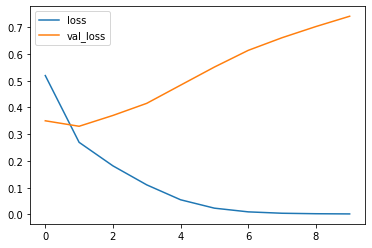

In [59]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

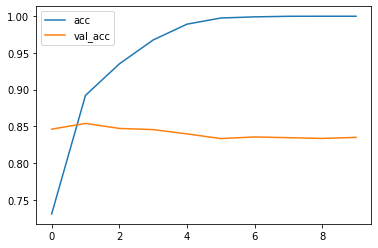

In [60]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

### 가중치 분석

In [61]:
ws = model.get_weights()

In [62]:
ws[0].shape # 단어 만개에 대한 가중치 (또는 특성 벡터)

(10000, 8)

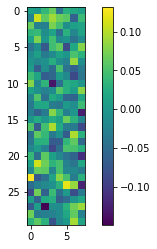

In [63]:
plt.imshow(ws[0][:30])
plt.colorbar()

- 비슷한 패턴의 행들에 해당하는 단어들은 문장에서 같이 등장할 가능성이 크다.
- 위에서 14번과 16번 단어는 비슷한 패턴이다

In [65]:
i2w[14-3], i2w[16-3], i2w[20-3]

('this', 'was', 'movie')

In [66]:
i2w[21-3]

'but'

In [71]:
mat = ws[0]
n = w2i['excellent'] + 3

distance = []

for i in range(10000):
    distance.append(((mat[n]-mat[i])**2).sum())
    
result = np.argsort(distance)[-10:]
result

array([3316, 3013,  373, 3121,  862, 4063, 3179,  249,  437, 1149],
      dtype=int64)

In [72]:
for i in result:
    print(i2w[i-3])

incoherent
ashamed
awful
wasting
poorly
unwatchable
mst3k
worst
waste
pointless


### GloVe 적용
- glove 는 스탠포드 대학교에서 만든 2014년 영문 위키피디아를 사용하여 사전에 계산한 임베딩임
- 구글의 Word2vec 와 함께 인기가 많다
- https://nlp.stanford.edu/projects/glove
- https://bit.ly/2NIJwdb 에서 glove.6B.zip 다운로드 (이 중 glove.6B.100d.txt 사용)
- 단어 40만개, 100차원

In [73]:
f = open('F:\\datasets\\glove.6B.100d.txt', encoding='utf8')
s = f.readline()
s2 = f.readline()
f.close()

In [74]:
s

'the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062\n'

In [75]:
s2

', -0.10767 0.11053 0.59812 -0.54361 0.67396 0.10663 0.038867 0.35481 0.06351 -0.094189 0.15786 -0.81665 0.14172 0.21939 0.58505 -0.52158 0.22783 -0.16642 -0.68228 0.3587 0.42568 0.19021 0.91963 0.57555 0.46185 0.42363 -0.095399 -0.42749 -0.16567 -0.056842 -0.29595 0.26037 -0.26606 -0.070404 -0.27662 0.15821 0.69825 0.43081 0.27952 -0.45437 -0.33801 -0.58184 0.22364 -0.5778 -0.26862 -0.20425 0.56394 -0.58524 -0.14365 -0.64218 0.0054697 -0.35248 0.16162 1.1796 -0.47674 -2.7553 -0.1321 -0.047729 1.0655 1.1034 -0.2208 0.18669 0.13177 0.15117 0.7131 -0.35215 0.91348 0.61783 0.70992 0.23955 -0.14571 -0.37859 -0.045959 -0.47368 0.2385 0.20536 -0.18996 0.32507 -1.1112 -0.36341 0.98679 -0.084776 -0.54008 0.11726 -1.0194 -0.24424 0.12771 0.013884 0.080374 -0.35414 0.34951 -0.7226 0.37549 0.4441 -0.99059 0.61214 -0.35111 -0.83155 0.45293 0.082577\n'

In [77]:
word = []
vec = []

f = open('f:/datasets/glove.6B.100d.txt', encoding='utf8')
for line in f:
    l = line.strip().split()
    word.append(l[0])
    vec.append([float(n) for n in l[1:]])
    break

In [81]:
word[0], len(vec[0])

('the', 100)

In [82]:
n = 0

f = open('f:/datasets/glove.6B.100d.txt', encoding='utf8')
for line in f:
    n += 1
f.close()

n # 40만 개의 단어

400000